In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt



In [2]:
data=pd.read_csv('../input/shopping-dataset/shopping_data.csv')

In [3]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:

x = data.iloc[:, [0]].values
x


array([[  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
       [ 71],
      

In [5]:
sh=data.iloc[:,4:5].values
print(sh)

[[39]
 [81]
 [ 6]
 [77]
 [40]
 [76]
 [ 6]
 [94]
 [ 3]
 [72]
 [14]
 [99]
 [15]
 [77]
 [13]
 [79]
 [35]
 [66]
 [29]
 [98]
 [35]
 [73]
 [ 5]
 [73]
 [14]
 [82]
 [32]
 [61]
 [31]
 [87]
 [ 4]
 [73]
 [ 4]
 [92]
 [14]
 [81]
 [17]
 [73]
 [26]
 [75]
 [35]
 [92]
 [36]
 [61]
 [28]
 [65]
 [55]
 [47]
 [42]
 [42]
 [52]
 [60]
 [54]
 [60]
 [45]
 [41]
 [50]
 [46]
 [51]
 [46]
 [56]
 [55]
 [52]
 [59]
 [51]
 [59]
 [50]
 [48]
 [59]
 [47]
 [55]
 [42]
 [49]
 [56]
 [47]
 [54]
 [53]
 [48]
 [52]
 [42]
 [51]
 [55]
 [41]
 [44]
 [57]
 [46]
 [58]
 [55]
 [60]
 [46]
 [55]
 [41]
 [49]
 [40]
 [42]
 [52]
 [47]
 [50]
 [42]
 [49]
 [41]
 [48]
 [59]
 [55]
 [56]
 [42]
 [50]
 [46]
 [43]
 [48]
 [52]
 [54]
 [42]
 [46]
 [48]
 [50]
 [43]
 [59]
 [43]
 [57]
 [56]
 [40]
 [58]
 [91]
 [29]
 [77]
 [35]
 [95]
 [11]
 [75]
 [ 9]
 [75]
 [34]
 [71]
 [ 5]
 [88]
 [ 7]
 [73]
 [10]
 [72]
 [ 5]
 [93]
 [40]
 [87]
 [12]
 [97]
 [36]
 [74]
 [22]
 [90]
 [17]
 [88]
 [20]
 [76]
 [16]
 [89]
 [ 1]
 [78]
 [ 1]
 [73]
 [35]
 [83]
 [ 5]
 [93]
 [26]
 [75]
 [20

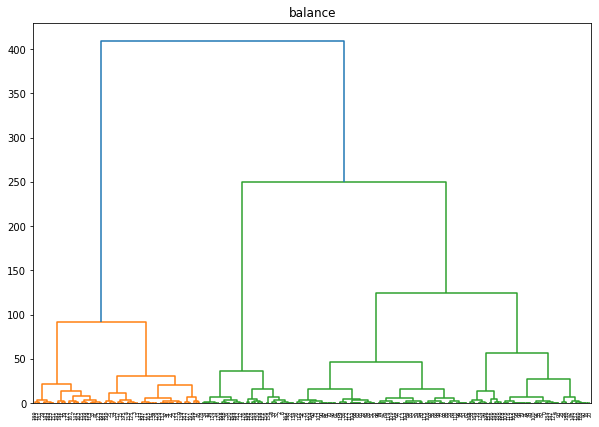

In [6]:
#drawing dendogram
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))  
plt.title("balance")  
dend = shc.dendrogram(shc.linkage(sh, method='ward')) 

In [7]:
#clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='single')  
d=cluster.fit_predict(sh) 
print(d) 



[1 1 3 1 1 1 3 1 3 1 3 1 3 1 3 1 0 1 0 1 0 1 3 1 3 1 0 1 0 1 3 1 3 1 3 1 3
 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 1 1 3 1 0 1
 0 1 3 1 4 1 3 1 2 1 2 1 0 1 3 1 0 1 4 1 0 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 1
 1 0 1 3 1 0 1 3 1 3 1 0 1 3 1]


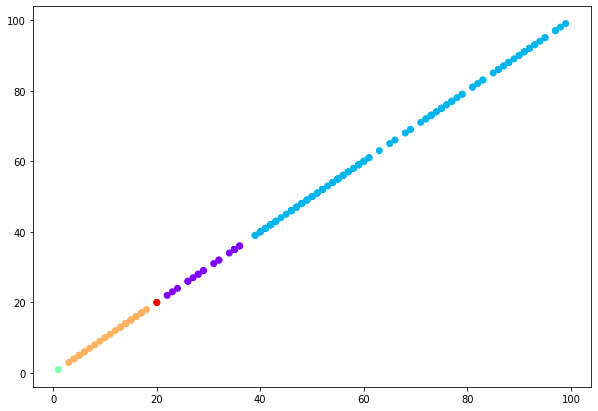

In [8]:
#Plotting 
plt.figure(figsize=(10, 7))  
plt.scatter(sh[:,0],sh[:,0], c=cluster.labels_, cmap='rainbow')

In [9]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(sh,d)
print("For n_clusters =", 5,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 5 The average silhouette_score is : 0.23225347939649155


In [10]:
#clustering
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='complete')  
d=cluster.fit_predict(sh) 
print(d) 



[2 0 1 0 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 2 1 0 1 0 1 0 1 0 1
 0 1 0 1 0 1 2 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2 0 1 0 1 0
 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 2
 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0]


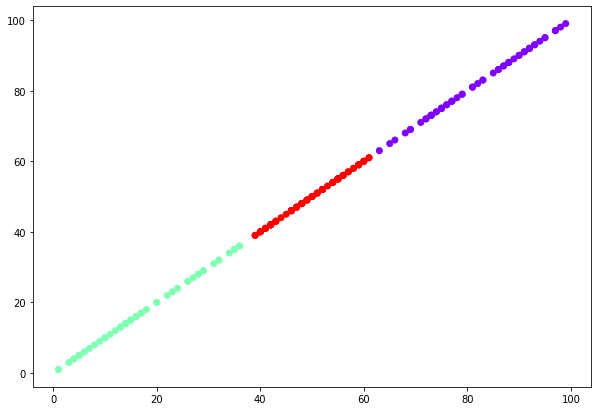

In [11]:
#Plotting 
plt.figure(figsize=(10, 7))  
plt.scatter(sh[:,0],sh[:,0], c=cluster.labels_, cmap='rainbow')

In [12]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(sh,d)
print("For n_clusters =", 3,
          "The average silhouette_score is :", silhouette_avg)

For n_clusters = 3 The average silhouette_score is : 0.624672502353131
